<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)


(True, True)

Check that R is triangular

In [4]:
npR
npR

array([[-1.3954, -1.3283, -0.9616, -0.7637, -1.1209],
       [ 0.    ,  0.5624, -0.0183,  0.4307, -0.1948],
       [ 0.    ,  0.    , -0.8526,  0.3787, -0.387 ],
       [ 0.    ,  0.    ,  0.    , -0.1565,  0.0613],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.2501]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [5]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    Q[:,0] = A[:,0]/np.linalg.norm(A[:,0])
    for i in range(1,n):
        Q[:,i] = A[:,i]
        for j in range(i):
            Q[:,i] = Q[:,i] - (Q[:,i]@Q[:,j])*Q[:,j]
        Q[:,i] = Q[:,i]/np.linalg.norm(Q[:,i])
    for i in range(m):
        for j in range(i+1):
            R[j,i] = (Q[:,j]@A[:,i])
    ##Your Code ends here
    return Q, R

In [6]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [8]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [9]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [10]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        Q[:,j] = V[:,j]
        for i in range(j):
            R[i,j] = np.dot(Q[:,i] , Q[:,j])
            Q[:,j] -= R[i,j] * Q[:,i]

        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] /= R[j,j]
    ##Your Code ends here
    return Q, R

In [11]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [12]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [14]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [15]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

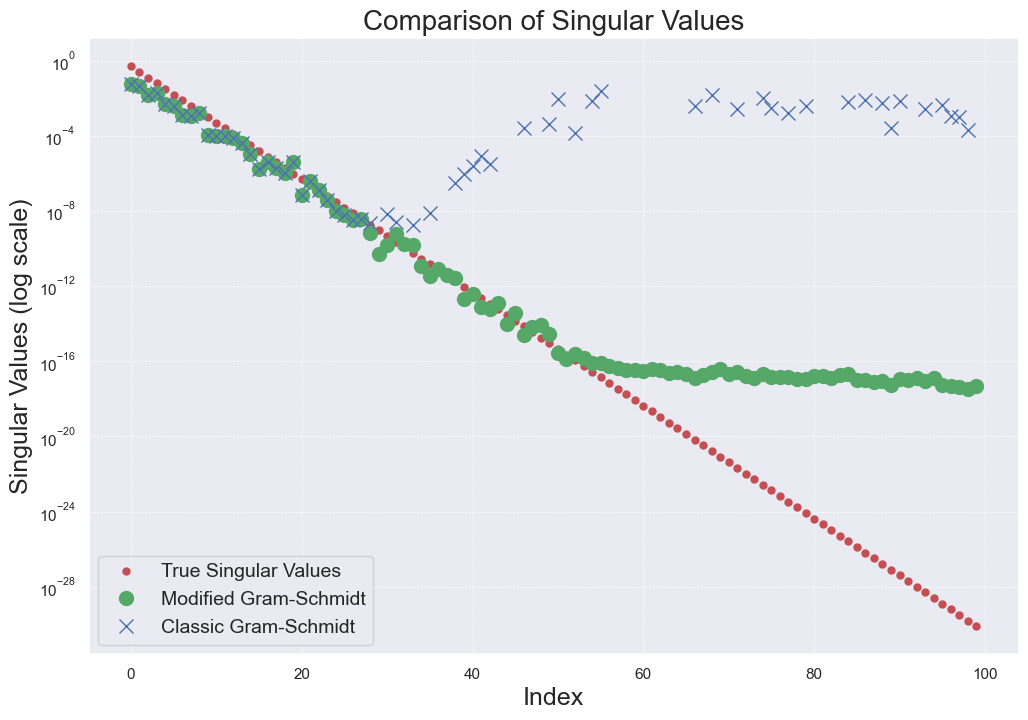

In [31]:

sns.set()

plt.figure(figsize=(12, 8))
plt.semilogy(np.diag(S), 'r.', markersize=10, label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', markersize=10, label="Modified Gram-Schmidt")
plt.semilogy(np.diag(RC), 'bx', markersize=10, label="Classic Gram-Schmidt")

plt.title('Comparison of Singular Values', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Singular Values (log scale)', fontsize=18)

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(fontsize=14)

rcParams.update({'font.size': 14})
plt.show()

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [16]:
##Your Code start here
def QReigen(A,n):
    if n==0:
        Lambda = np.array(A).diagonal().copy()
        Lambda.sort()
        return Lambda

    else:
        Q, R = cgs(A)
        A1 = np.dot(R,Q)
        return QReigen(A1,n-1)
##Your Code ends here

In [17]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
print("\n --- Using QR method ---\n")
print("n = 1 :")
print(QReigen(A,1))
print("\n")
print("n = 5 :")
print(QReigen(A,5))
print("\n")
print("n = 10 :")
print(QReigen(A,10))
print("\n")
print("n = 20 :")
print(QReigen(A,20))
print("\n")
print("n = 100 :")
print(QReigen(A,100))
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 --- Using QR method ---

n = 1 :
[0. 2. 2. 3.]


n = 5 :
[-0.247   1.4541  2.7929  3.    ]


n = 10 :
[-0.247   1.4451  2.8019  3.    ]


n = 20 :
[-0.247   1.445   2.8019  3.    ]


n = 100 :
[-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

In [35]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

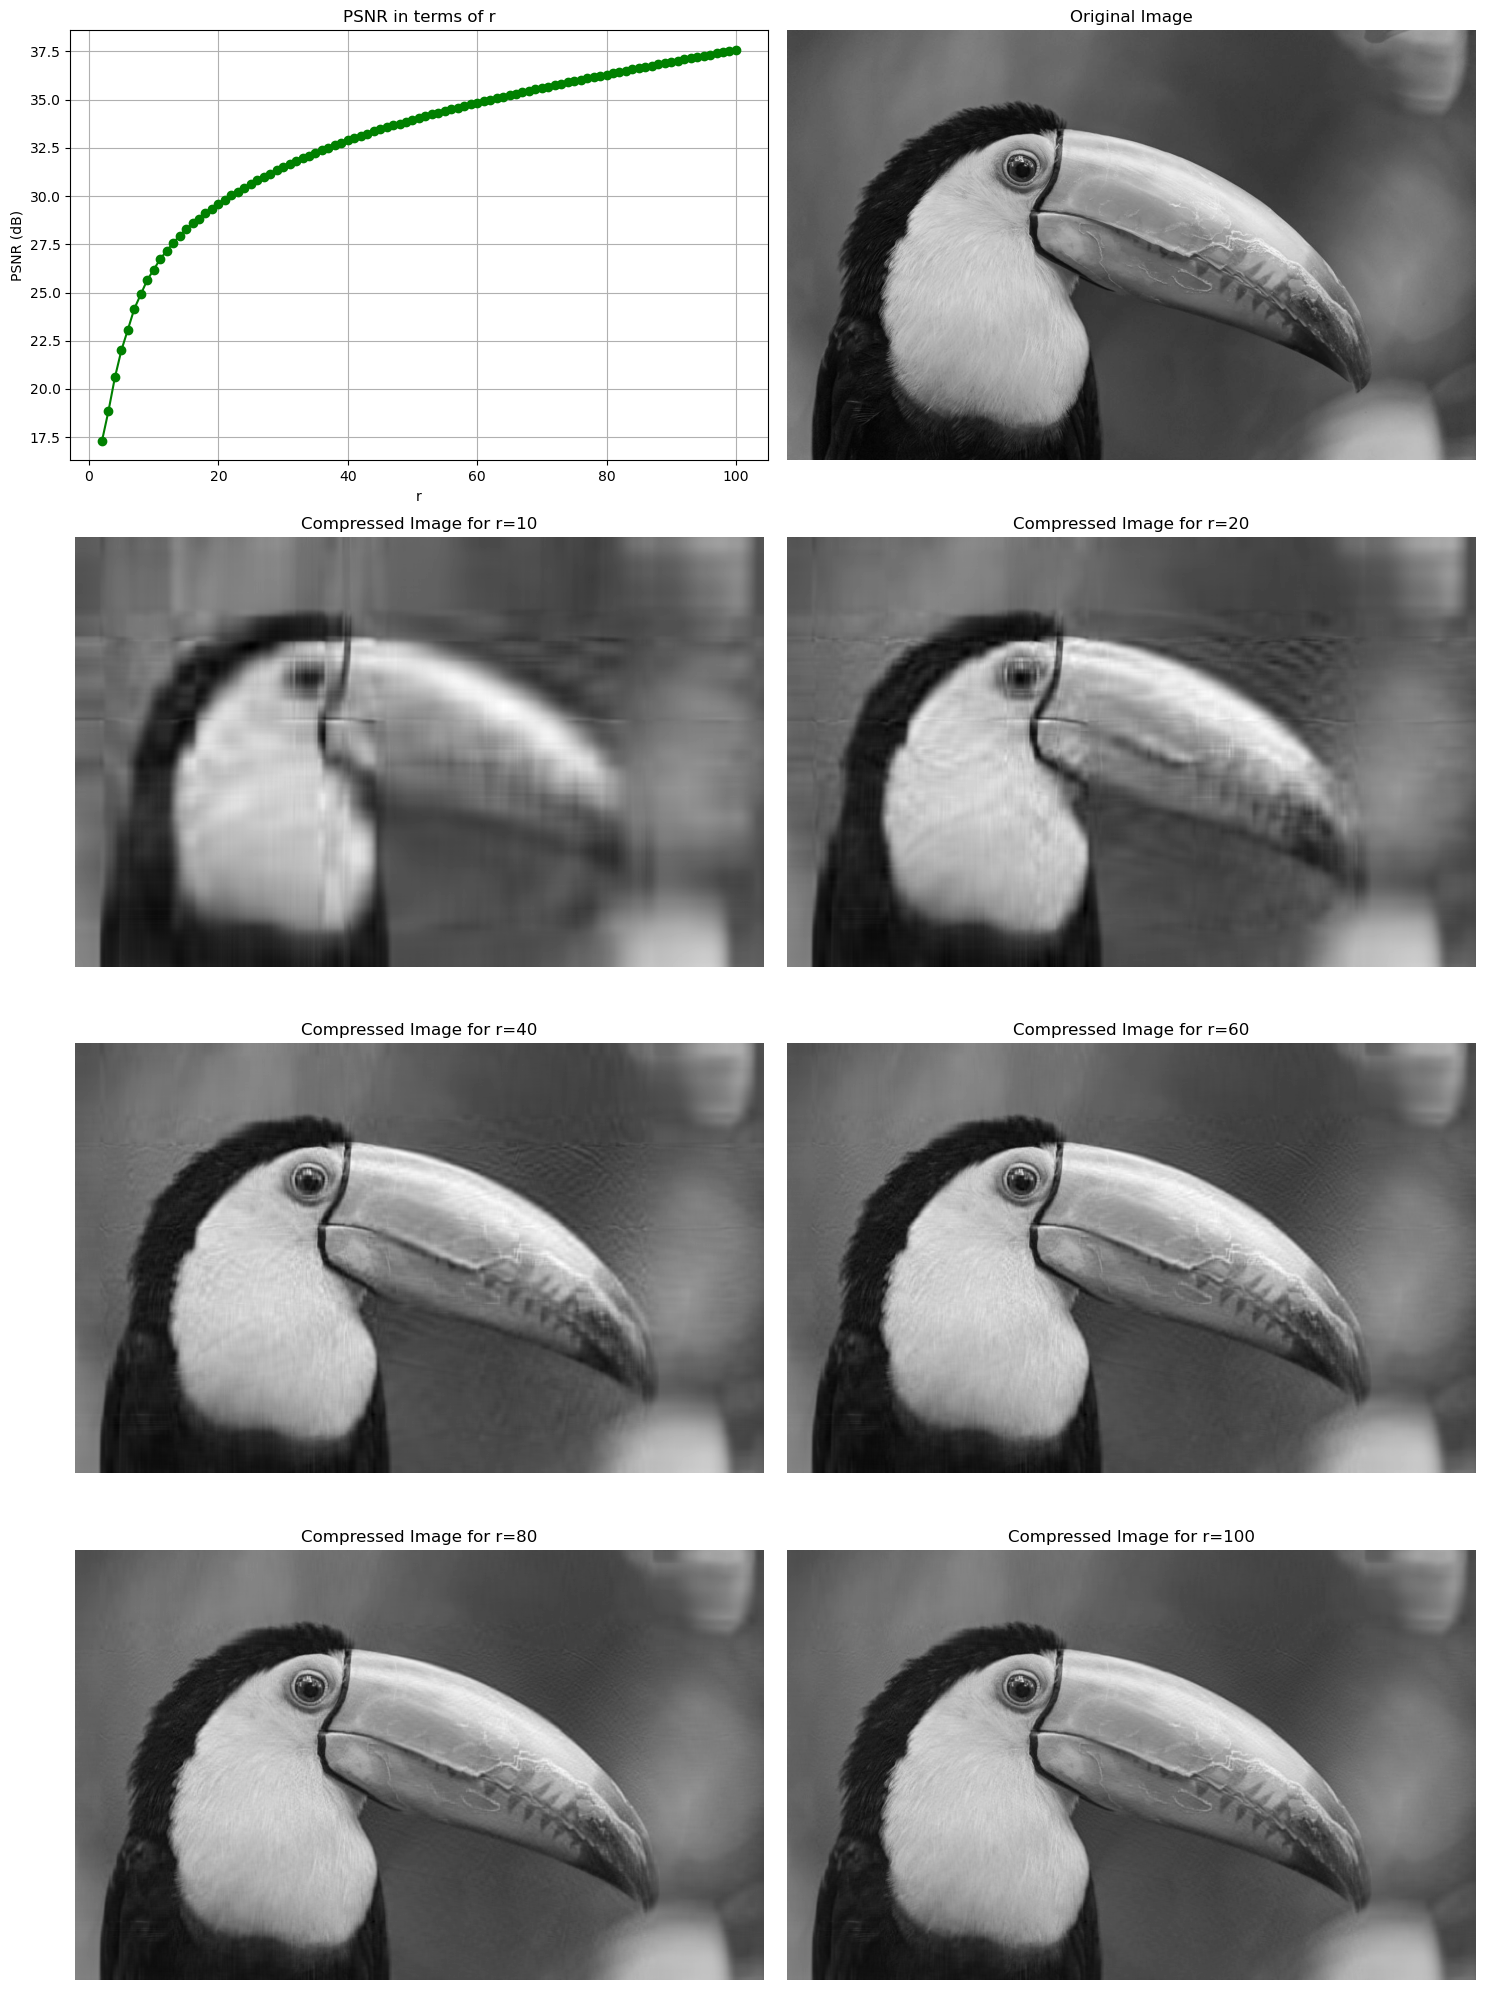

In [30]:

##Your Code start here
# Function to compute the Peak Signal-to-Noise Ratio (PSNR) for image compression
def compute_psnr(BWimg, r):
    # Perform Singular Value Decomposition (SVD) on the image
    U, sigma, VT = np.linalg.svd(BWimg, full_matrices=False)
    # Reconstruct the compressed image using the first 'r' singular values/vectors
    compimg = U[:, :r] @ np.diag(sigma[:r]) @ VT[:r, :]
    # Compute the Mean Squared Error (MSE) between the original and compressed images
    MSE = mean_squared_error(BWimg, compimg)
    # Compute the PSNR from the MSE
    return 10*math.log10((255**2)/MSE), compimg

# Function to plot an image
def plot_image(subplot, image, title):
    plt.subplot(subplot)  # Create a subplot
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.title(title)  # Set the title of the plot
    plt.axis('off')  # Hide the axes

# Function to compute and plot the PSNR for different levels of compression
def PSNR(address):
    img = cv2.imread(address)  # Read the image file
    BWimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale

    psnr = []  # List to store the PSNR values
    images = {}  # Dictionary to store the compressed images
    for r in range(2,101):  # Loop over different numbers of singular values
        psnr_value, compimg = compute_psnr(BWimg, r)  # Compute the PSNR and compressed image
        psnr.append(psnr_value)  # Append the PSNR to the list
        if r in [10, 20, 40, 60, 80, 100]:  # If 'r' is a significant value
            images[r] = compimg  # Store the compressed image

    plt.figure(figsize=(15, 20))  # Create a new figure with a specified size
    plt.subplot(4,2,1)  # Create a subplot
    plt.plot(range(2,101),psnr,"o-",color = 'g')  # Plot the PSNR values
    plt.xlabel('r')  # Set the x-label
    plt.ylabel("PSNR (dB)")  # Set the y-label
    plt.title('PSNR in terms of r')  # Set the title
    plt.grid(True)  # Add a grid to the plot

    # Plot the original and compressed images
    plot_image(422, BWimg, 'Original Image')
    plot_image(423, images[10], 'Compressed Image for r=10')
    plot_image(424, images[20], 'Compressed Image for r=20')
    plot_image(425, images[40], 'Compressed Image for r=40')
    plot_image(426, images[60], 'Compressed Image for r=60')
    plot_image(427, images[80], 'Compressed Image for r=80')
    plot_image(428, images[100], 'Compressed Image for r=100')

    plt.tight_layout()  # Adjust the layout to prevent overlapping

# Call the PSNR function with a specific image file
PSNR("pic.jpg")
##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


Answer: From the PSNR graphs, it’s evident that the decrease in PSNR for Gaussian noise with an increase in rank is more rapid compared to salt and pepper noise. Consequently, the performance of original image reconstruction at higher ranks is superior for salt and pepper noise.


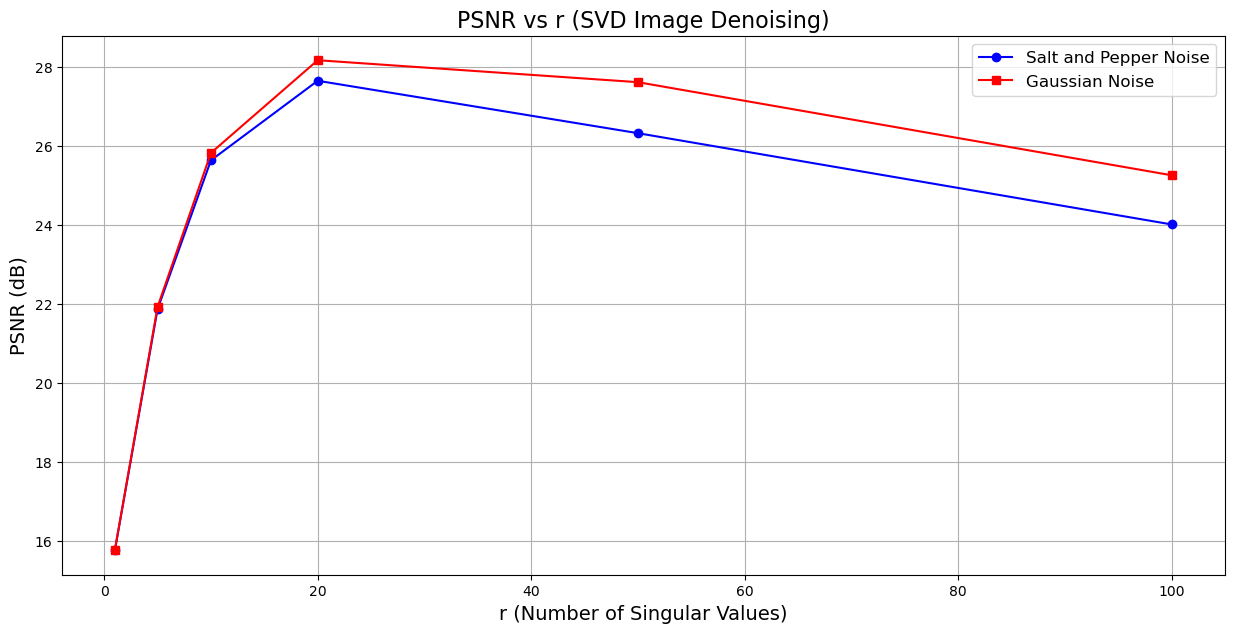

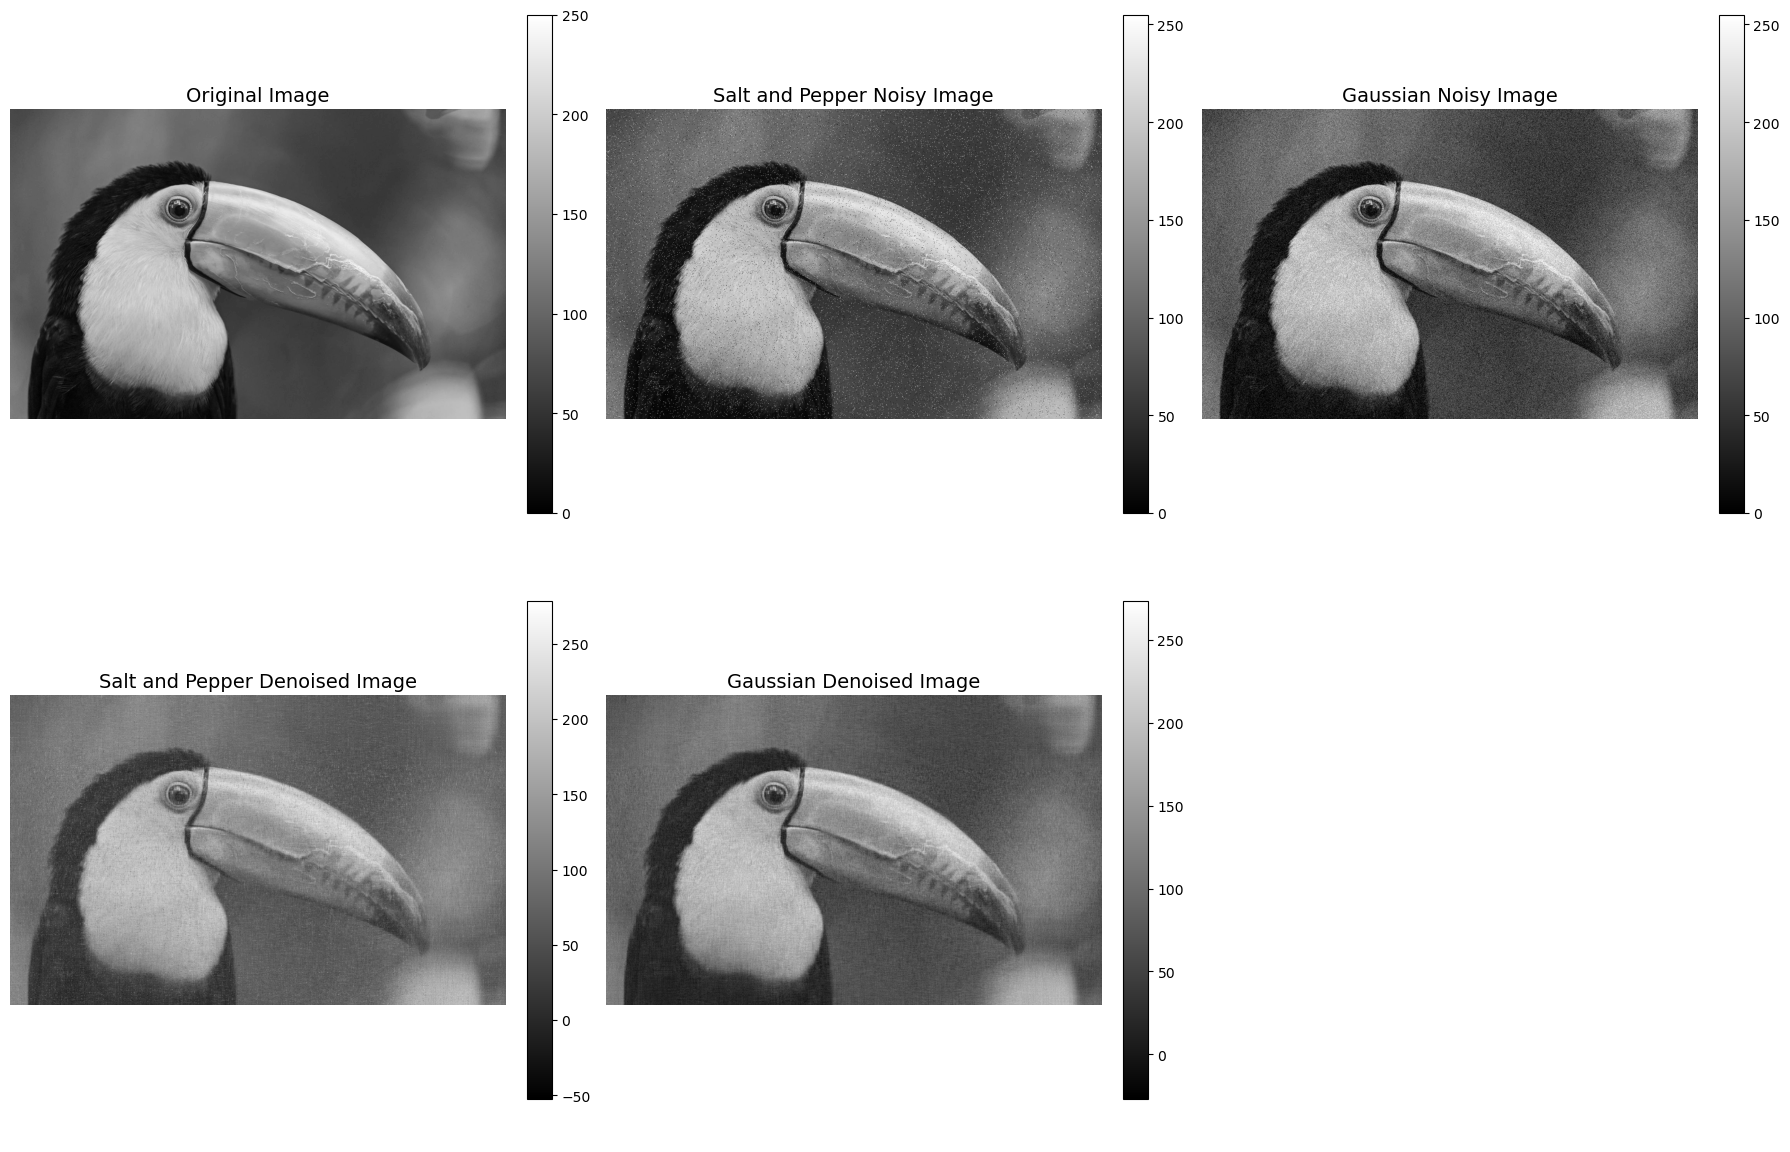

In [35]:
# Define a class for image denoising
class ImageDenoiser:
    # Initialize the class with the original image
    def __init__(self, file_path):
        self.original_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Function to add salt and pepper noise to the image
    def add_salt_and_pepper_noise(self, salt_prob, pepper_prob):
        noisy_image = self.original_image.copy()
        total_pixels = self.original_image.size

        # Add salt noise
        num_salt = np.ceil(salt_prob * total_pixels)
        salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in self.original_image.shape]
        noisy_image[salt_coords[0], salt_coords[1]] = 255

        # Add pepper noise
        num_pepper = np.ceil(pepper_prob * total_pixels)
        pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in self.original_image.shape]
        noisy_image[pepper_coords[0], pepper_coords[1]] = 0

        return noisy_image

    # Function to add Gaussian noise to the image
    def add_gaussian_noise(self, mean, std_dev):
        noisy_image = self.original_image + np.random.normal(mean, std_dev, self.original_image.shape)
        return np.clip(noisy_image, 0, 255).astype(np.uint8)

    # Function to denoise the image using Singular Value Decomposition (SVD)
    def denoise_image_svd(self, noisy_image, r_values):
        psnr_values = []
        reconstructed_images = []

        for r in r_values:
            U, Sigma, Vt = np.linalg.svd(noisy_image, full_matrices=False)
            reconstructed_image = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))
            mse = np.mean((self.original_image - reconstructed_image) ** 2)
            psnr_values.append(20 * np.log10(255 / np.sqrt(mse)))
            reconstructed_images.append(reconstructed_image)

        return psnr_values, reconstructed_images

# Create an instance of the ImageDenoiser class
denoiser = ImageDenoiser('pic.jpg')

# Define the probabilities for salt and pepper noise
salt_prob = 0.02
pepper_prob = 0.02

# Define the mean and standard deviation for Gaussian noise
gaussian_mean = 0
gaussian_std_dev = 25

# Add Salt and Pepper noise to the image
salt_pepper_noisy_image = denoiser.add_salt_and_pepper_noise(salt_prob, pepper_prob)

# Add Gaussian noise to the image
gaussian_noisy_image = denoiser.add_gaussian_noise(gaussian_mean, gaussian_std_dev)

# Define the r values for SVD
r_values = [1, 5, 10, 20, 50, 100]

# Perform denoising using SVD for salt and pepper noise
psnr_salt_pepper, reconstructed_images_salt_pepper = denoiser.denoise_image_svd(salt_pepper_noisy_image, r_values)

# Perform denoising using SVD for Gaussian noise
psnr_gaussian, reconstructed_images_gaussian = denoiser.denoise_image_svd(gaussian_noisy_image, r_values)

# Plot the PSNR values for the denoised images
plt.figure(figsize=(15, 7))
plt.plot(r_values, psnr_salt_pepper, marker='o', linestyle='-', color='blue', label='Salt and Pepper Noise')
plt.plot(r_values, psnr_gaussian, marker='s', linestyle='-', color='red', label='Gaussian Noise')
plt.title('PSNR vs r (SVD Image Denoising)', fontsize=16)
plt.xlabel('r (Number of Singular Values)', fontsize=14)
plt.ylabel('PSNR (dB)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Display the original and denoised images
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

images = [denoiser.original_image, salt_pepper_noisy_image, gaussian_noisy_image, 
          reconstructed_images_salt_pepper[-1], reconstructed_images_gaussian[-1]]
titles = ['Original Image', 'Salt and Pepper Noisy Image', 'Gaussian Noisy Image', 
          'Salt and Pepper Denoised Image', 'Gaussian Denoised Image']

for i, ax in enumerate(axs.flat):
    if i < len(images):
        im = ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i], fontsize=14)
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score

### Import Dataset

In [7]:
Datapoint = pd.read_csv('Datapoint.csv')


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

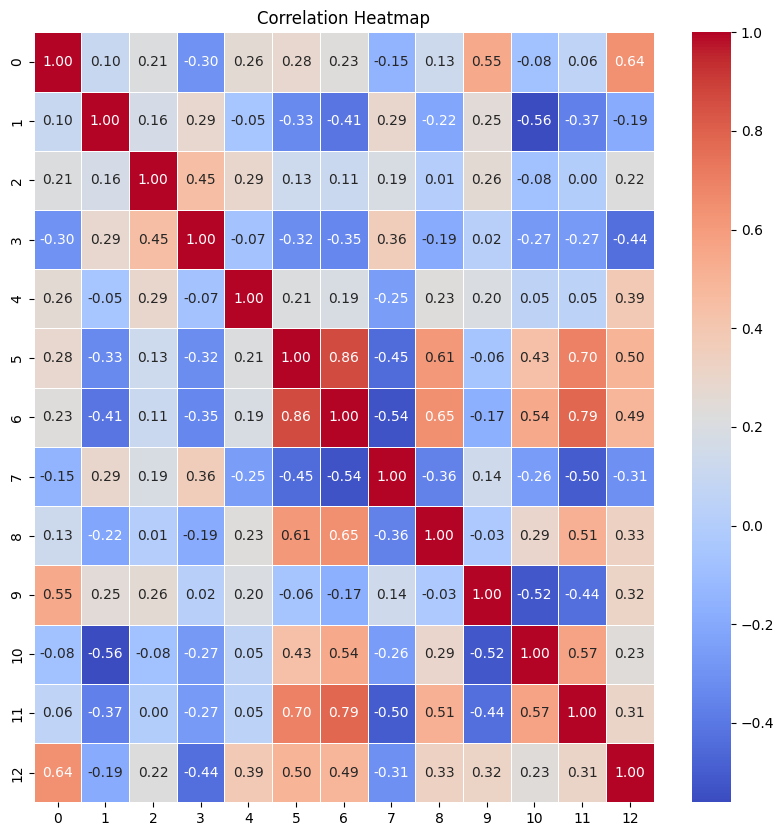

In [10]:
##Your Code start here
corrcoef = np.corrcoef(Datapoint, rowvar=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corrcoef, annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5,annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

##Your Code ends here

According to the display of the correlation matrix, we can see that Features 5 and 6 and 11 similar characteristics above 70%, as a result, We can determine the number of principal components as :
13 - 3 + 1 = 11

###  Data Preprocessing

In [8]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

d:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


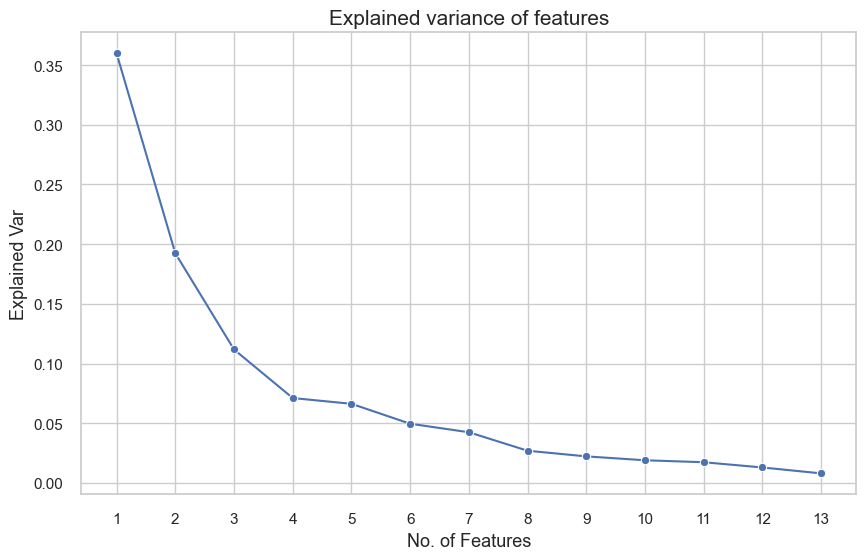

In [9]:
##Your Code start here
# Centering the data
CenteredDatapoint = Datapoint.sub(Datapoint.mean(axis=0)).div(Datapoint.std(axis=0))

# Calculating covariance matrix
covMatrix = np.cov(CenteredDatapoint.T)


# Eigen decomposition
EigVal, EigVec = np.linalg.eigh(covMatrix)

# Sorting eigenvalues and corresponding eigenvectors
sortInd = EigVal.argsort()[::-1]
EigVal = EigVal[sortInd]
EigVec = EigVec[:, sortInd]

# Calculating explained variance
explainedVar = EigVal / EigVal.sum()

# Plotting explained variance
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting explained variance with a line plot and point markers
sns.lineplot(x=np.arange(1, 14), y=explainedVar, marker="o", sort=False, ax=ax)

# Set the title and labels
ax.set_title('Explained variance of features', fontsize=15)
ax.set_xlabel('No. of Features', fontsize=13)
ax.set_ylabel('Explained Var', fontsize=13)

# Set the xticks
plt.xticks(np.arange(1, 14))

# Show the plot
plt.show()
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [10]:
##Your Code start here
r = 4
EigVecCustom = EigVec[:,0:r]
SSfeats = CenteredDatapoint @ EigVecCustom
SSfeats
##Your Code ends here

,0,1,2,3
0,-2.223934,-0.301458,2.027169,-0.281109
1,-2.524760,1.059252,-0.973961,0.733646
2,-3.744056,2.797373,0.179860,0.575492
3,-1.017245,0.885867,-2.018145,-0.431568
4,-3.040574,2.163868,0.636940,-0.486248
...,...,...,...,...
172,3.363347,2.179279,0.340163,1.088250
173,2.594793,1.734883,-0.211804,0.336053
174,2.684530,2.732124,0.920500,0.240713
175,2.391609,2.273479,0.535961,-0.727302


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

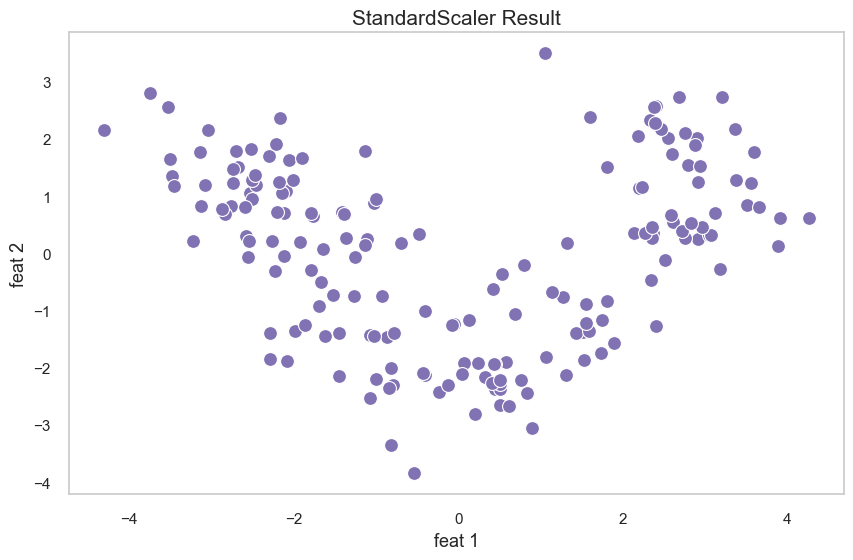

In [11]:
##Your Code start here
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the scatter plot
sns.scatterplot(x=SSfeats[0], y=SSfeats[1], color='m', s=100, ax=ax)

# Set the title and labels
ax.set_title('StandardScaler Result', fontsize=15)
ax.set_xlabel('feat 1', fontsize=13)
ax.set_ylabel('feat 2', fontsize=13)

# Remove the grid
ax.grid(False)

# Show the plot
plt.show()
##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




MinMaxScaler and StandardScaler are two commonly used techniques for data normalization in machine learning. Let’s contrast these two methods:

Value Range:
MinMaxScaler adjusts the data to a predetermined range, usually from 0 to 1, whereas StandardScaler normalizes the data by subtracting the mean and scaling to unit variance.


MinMaxScaler is beneficial when the data range is known and constant, while StandardScaler is advantageous when the data follows a normal distribution.


Outlier Management:
MinMaxScaler is affected by outliers as it shrinks all inliers into a small range. In contrast, StandardScaler is less influenced by outliers because it subtracts the mean and scales to unit variance.


Interpretability:
MinMaxScaler maintains the original scale of the data, while StandardScaler modifies the data to have a mean of 0 and a standard deviation of 1.


Algorithm Compatibility:
MinMaxScaler is appropriate for algorithms that need features to be on a similar scale, such as neural networks. On the other hand, StandardScaler is suitable for algorithms that presume the data is normally distributed, like linear regression, logistic regression, and linear discriminant analysis.


In conclusion, the decision between MinMaxScaler and StandardScaler hinges on the specific needs of the machine learning algorithm and the properties of the data, such as the existence of outliers and the assumption of the data distribution.

d:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


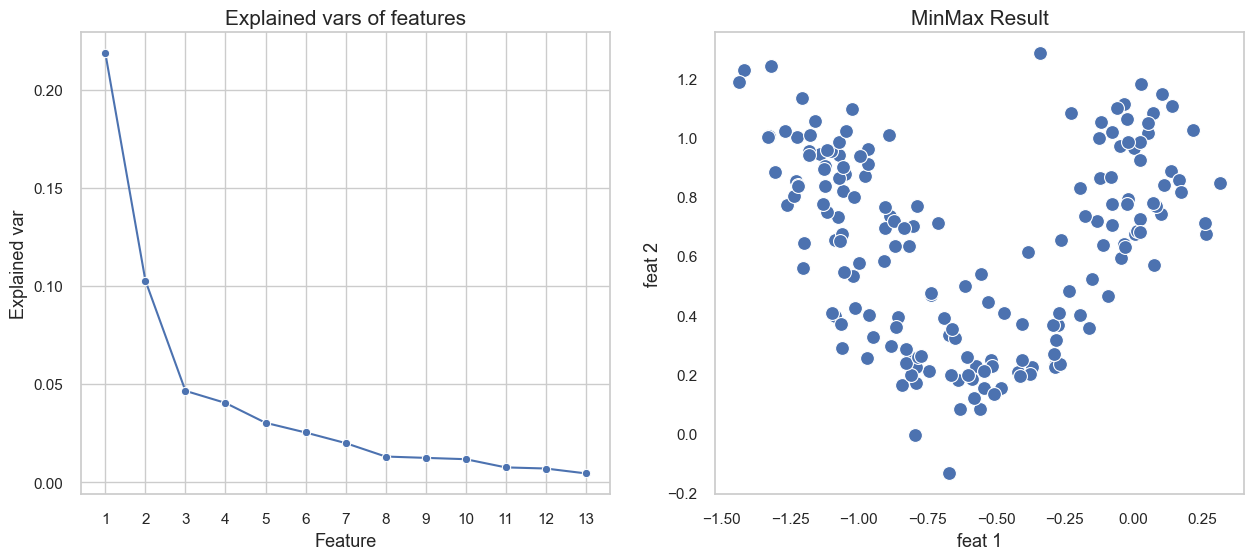

In [12]:
##Your Code start here
# Min-Max scaling
MinMaxscaled = Datapoint.sub(Datapoint.min()).div(Datapoint.max() - Datapoint.min())

# Calculating covariance matrix
covMatrix = np.cov(MinMaxscaled.T)

# Eigen decomposition
EigVal, EigVec = np.linalg.eigh(covMatrix)

# Sorting eigenvalues and corresponding eigenvectors
sortInd = EigVal.argsort()[::-1]
EigVal = EigVal[sortInd]
EigVec = EigVec[:, sortInd]

# Explained variance is the eigenvalues
explainedVar = EigVal

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting explained variance with a line plot and point markers
sns.lineplot(x=np.arange(1, 14), y=explainedVar, marker="o", sort=False, ax=axs[0])

# Set the title and labels for the first plot
axs[0].set_title('Explained vars of features', fontsize=15)
axs[0].set_xlabel('Feature', fontsize=13)
axs[0].set_ylabel('Explained var', fontsize=13)

# Set the xticks for the first plot
axs[0].set_xticks(np.arange(1, 14))

# Selecting top r eigenvectors
r = 4
EigVec = EigVec[:, :r]
MMfeats = MinMaxscaled @ EigVec

# Plotting the result of MinMax scaling
sns.scatterplot(x=MMfeats[0], y=MMfeats[1], s=100, ax=axs[1])

# Set the title and labels for the second plot
axs[1].set_title('MinMax Result', fontsize=15)
axs[1].set_xlabel('feat 1', fontsize=13)
axs[1].set_ylabel('feat 2', fontsize=13)

# Remove the grid for the second plot
axs[1].grid(False)

# Show the plots
plt.show()
##Your Code ends here

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.wa

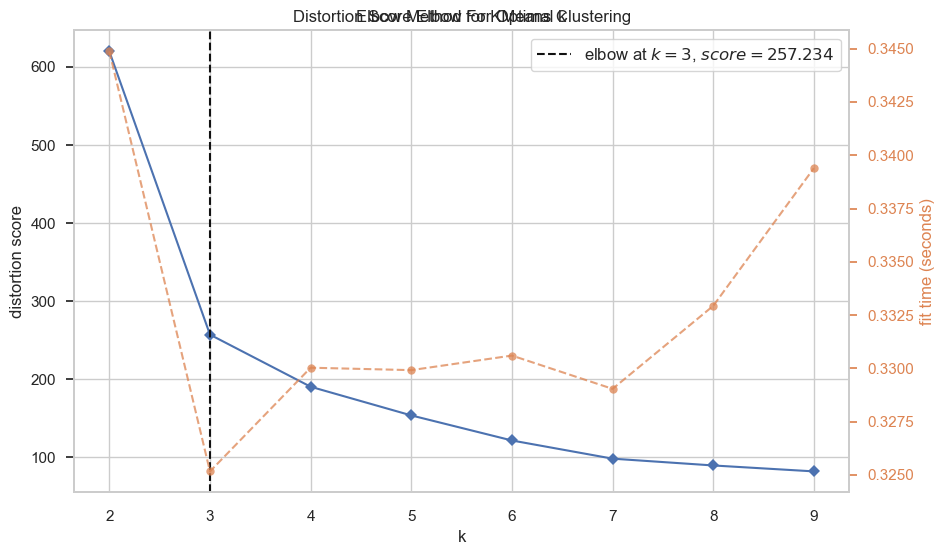

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
##Your Code start here
# Set the style of seaborn plot to "whitegrid" for better grid visibility
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a KMeans model
model = KMeans()

# Fit the model and visualize
visualizer = KElbowVisualizer(model, k=(2,10))

# Fit the data to the visualizer
visualizer.fit(pca_std_datapoint) 

# Set the title of the plot
plt.title('Elbow Method For Optimal k')

# Show the plot
visualizer.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




Inertia: In the realm of clustering, inertia serves as a measure to assess the suitability of a clustering algorithm. It is computed as the sum of squared distances from each data point to the centroid of its designated cluster. Inertia gauges the internal consistency of the clusters; a lower inertia value signifies that the clusters are more compact. However, inertia alone is not adequate to ascertain the optimal number of clusters, as it tends to diminish with an increase in the number of clusters. Hence, it is frequently used alongside other metrics, such as the silhouette score, to determine the ideal number of clusters.



Silhouette Score: The silhouette score is a metric that evaluates how alike an object is to its own cluster (cohesion) in comparison to other clusters (separation). It measures the quality of the clusters by taking into account the distance among data points and the separation between clusters. The silhouette score varies from -1 to 1, where a high value signifies that the object is well aligned with its own cluster and poorly aligned with adjacent clusters. A value nearing 1 indicates that the data point is correctly clustered, while a value nearing -1 implies that the data point might be incorrectly clustered. The silhouette score is a valuable metric for evaluating the suitability of the clustering arrangement and can assist in determining the optimal number of clusters.

In [18]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

  0%|          | 0/8 [00:00<?, ?it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:03,  2.06it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:00<00:02,  2.05it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00:01<00:02,  2.04it

In [19]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

  0%|          | 0/8 [00:00<?, ?it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:03,  2.15it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:00<00:02,  2.06it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00:01<00:02,  2.07it

Plot the **inertia** and **silhouette ** values

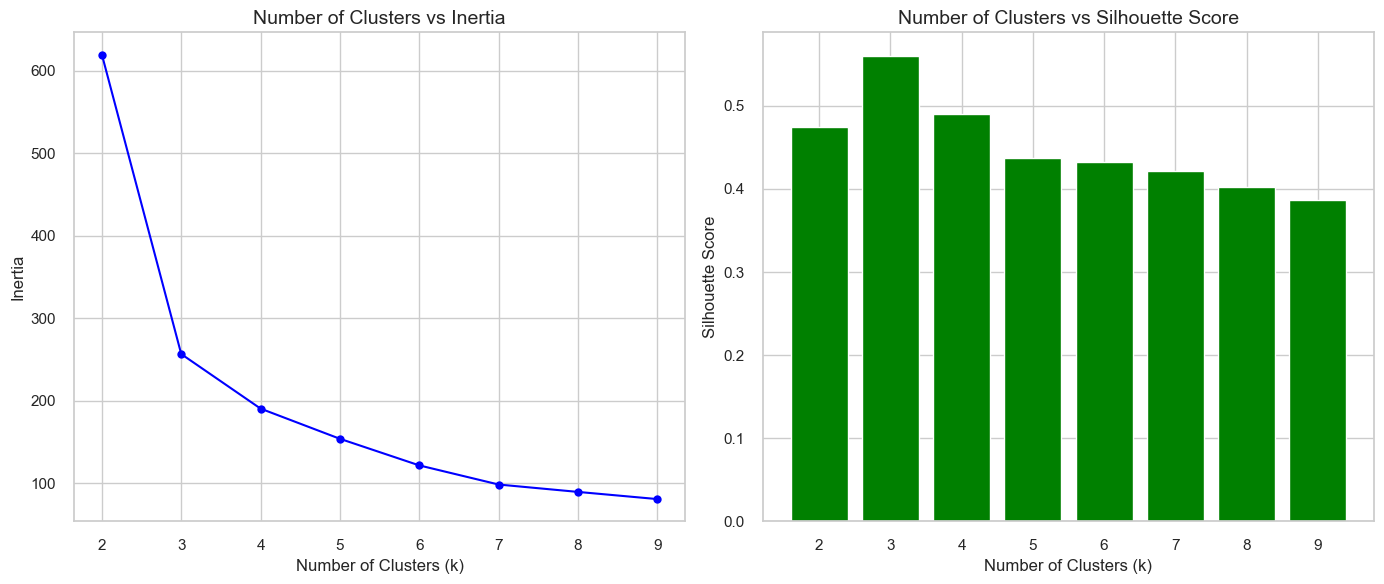

In [21]:
##Your Code start here
# Set the style of seaborn plot to "whitegrid" for better grid visibility
sns.set(style="whitegrid")

# Set the figure size
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Inertia
axs[0].plot(range(2, 10), inertia, marker='o', linestyle='-', color='blue')
axs[0].set_title('Number of Clusters vs Inertia', fontsize=14)
axs[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[0].set_ylabel('Inertia', fontsize=12)
axs[0].grid(True)

# Plot for Silhouette Score
axs[1].bar(silhouette.keys(), silhouette.values(), color='green')
axs[1].set_title('Number of Clusters vs Silhouette Score', fontsize=14)
axs[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[1].set_ylabel('Silhouette Score', fontsize=12)
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [27]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

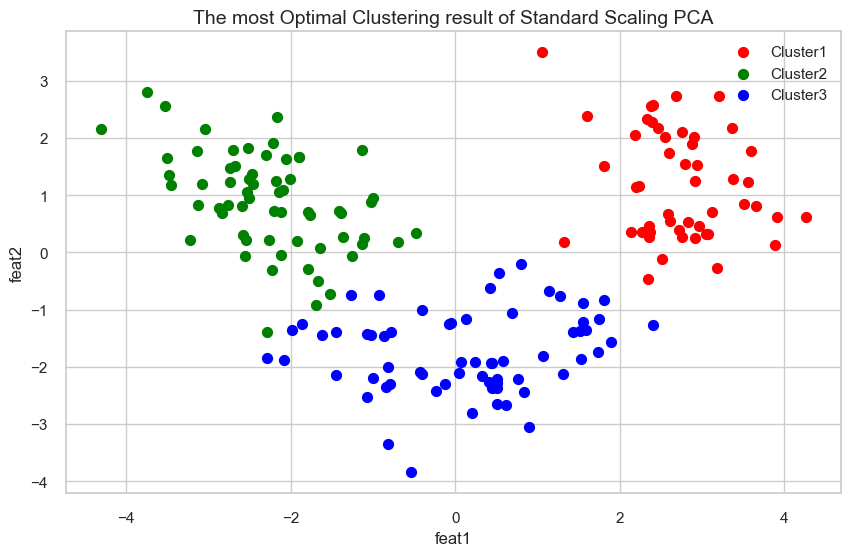

In [29]:
# Set the style of seaborn plot to "whitegrid" for better grid visibility
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Define colors
colors = ['red', 'green', 'blue']

# Convert data points to numpy array
points = np.array(pca_std_datapoint)

# Plot each cluster
for i in range(3):
    a = np.array(points[np.where(y_predict_kmeans1 == i)][:,0])
    b = np.array(points[np.where(y_predict_kmeans1 == i)][:,1])
    plt.scatter(a, b, s=50, label=f"Cluster{i+1}", color=colors[i])

# Set the title, x-label, y-label of the plot
plt.title("The most Optimal Clustering result of Standard Scaling PCA", fontsize=14)
plt.xlabel("feat1", fontsize=12)
plt.ylabel("feat2", fontsize=12)

# Show the legend
plt.legend()

# Show the plot
plt.show()

Do all previous steps for MinMax scaled data points.





d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.wa

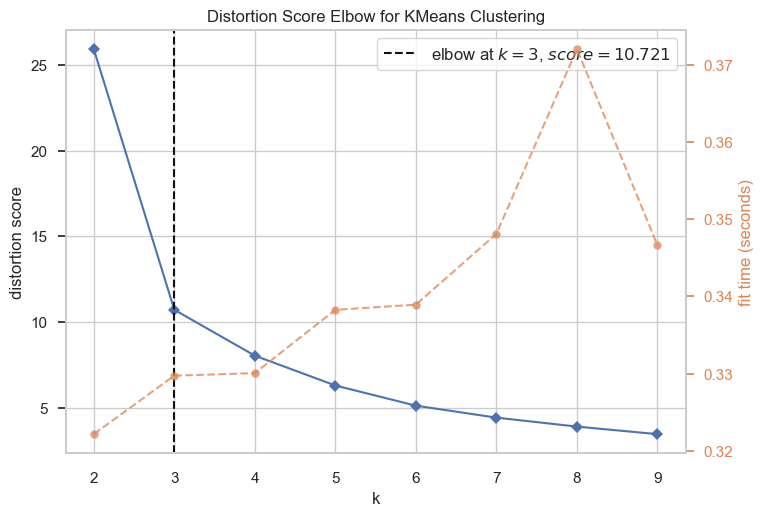

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Define the data points
pca_std_datapoint2 = MMfeats.iloc[:, [0, 1]]

# Create the KMeans model, fit it, and visualize it all in one line
KElbowVisualizer(KMeans(), k=(2,10)).fit(pca_std_datapoint2).show()

  0%|          | 0/8 [00:00<?, ?it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:03,  2.10it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:00<00:02,  2.08it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00:01<00:02,  2.05it

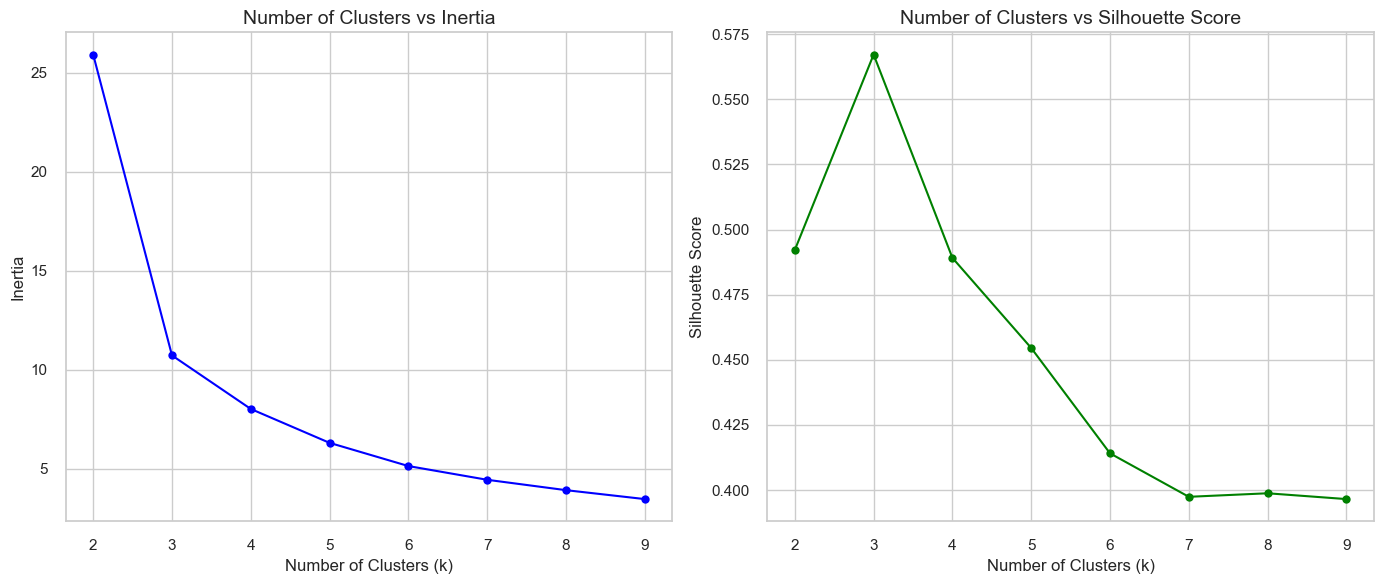

In [32]:
# Define the range of clusters
clusters = range(2, 10)

# Calculate inertia using list comprehension
inertia = [KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17).fit(pca_std_datapoint2).inertia_ for i in tqdm(clusters)]

# Calculate silhouette scores using dictionary comprehension
silhouette = {i: sil(pca_std_datapoint2, KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17).fit(pca_std_datapoint2).labels_, metric='euclidean') for i in tqdm(clusters)}

# Set the style of seaborn plot to "whitegrid" for better grid visibility
sns.set(style="whitegrid")

# Set the figure size
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Inertia
axs[0].plot(clusters, inertia, marker='o', linestyle='-', color='blue')
axs[0].set_title('Number of Clusters vs Inertia', fontsize=14)
axs[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[0].set_ylabel('Inertia', fontsize=12)
axs[0].grid(True)

# Plot for Silhouette Score
axs[1].plot(list(silhouette.keys()), list(silhouette.values()), marker='o', linestyle='-', color='green')
axs[1].set_title('Number of Clusters vs Silhouette Score', fontsize=14)
axs[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[1].set_ylabel('Silhouette Score', fontsize=12)
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [33]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans.fit_predict(pca_std_datapoint2)

d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


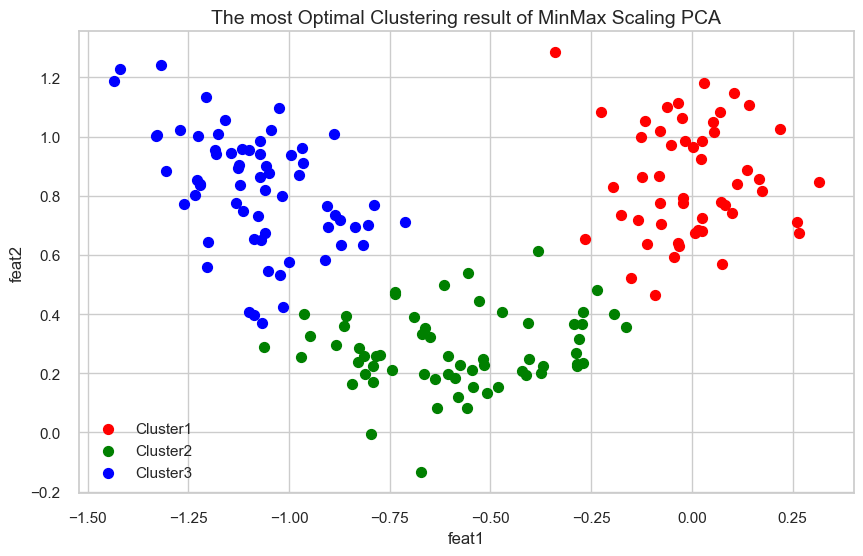

In [34]:
# Set the style of seaborn plot to "whitegrid" for better grid visibility
sns.set(style="whitegrid")

# Define colors
colors = ['red', 'green', 'blue']

# Convert data points to numpy array
points2 = np.array(pca_std_datapoint2)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot each cluster
for i, color in enumerate(colors):
    cluster_points = points2[y_predict_kmeans2 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, label=f"Cluster{i+1}", color=color)

# Set the title, x-label, y-label of the plot
plt.title("The most Optimal Clustering result of MinMax Scaling PCA", fontsize=14)
plt.xlabel("feat1", fontsize=12)
plt.ylabel("feat2", fontsize=12)

# Show the legend
plt.legend()

# Show the plot
plt.show()

Compare the results of different scaling methods in a PCA problem

The selection of a scaling technique can greatly influence the outcomes of a PCA problem. Here’s a recap of the findings from the search results:

StandardScaler: In one instance, StandardScaler delivered the best performance (AUC-ROC) on a Kaggle dataset. In another instance, StandardScaler secured the top scores in only 4 out of 16 scenarios. StandardScaler is apt for algorithms that presuppose that the data follows a normal distribution, such as linear regression, logistic regression, and linear discriminant analysis.

MinMaxScaler: In one instance, MinMaxScaler delivered the best performance (AUC-ROC) on a Kaggle dataset. In another instance, MinMaxScaler secured the top scores in only 1 out of 16 scenarios. MinMaxScaler is apt for algorithms that necessitate features to be on a comparable scale, such as neural networks.

In conclusion, the selection of a scaling method hinges on the specific needs of the machine learning algorithm and the attributes of the data, such as the existence of outliers and the assumption of the data distribution. It is advised to try out various scaling techniques to pinpoint the most effective method for a given problem.